In [1]:
## TP 1 - Recommandation de contenu avec surprise
## par Nicolas Dugué

In [2]:
## Installation préalable

#pip install --user numpy
#pip install --user pandas
#pip install --user scipy
#pip install --user surprise
#pip install --user pympler
#pip install --user mlflow



In [3]:
## Préliminaires

import numpy as np
from pympler import asizeof

dimM=1000

matriceCarre=np.zeros((dimM, dimM))
asizeof.asizeof(matriceCarre)

# Taille de la matrice dense

8000136

In [4]:
from scipy.sparse import csr_matrix

CSRMatriceCarre=csr_matrix(matriceCarre)
asizeof.asizeof(CSRMatriceCarre)

# Taille de la matrice creuse

5136

In [5]:
CSRMatriceCarre.__dict__

# Affichage de la matrice creuse

{'_shape': (1000, 1000),
 'maxprint': 50,
 'data': array([], dtype=float64),
 'indices': array([], dtype=int32),
 'indptr': array([0, 0, 0, ..., 0, 0, 0], dtype=int32)}

In [6]:
# Ajout de valeurs dans la matrice creuse
CSRMatriceCarre[0,1]=2
CSRMatriceCarre[0,3]=3
CSRMatriceCarre[2,4]=18

# Ajout de valeurs dans la matrics dense
matriceCarre[0,1]=2
matriceCarre[0,3]=3
matriceCarre[2,4]=18

CSRMatriceCarre.__dict__

# Affichage de la matrice creuse après ajout de valeurs

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


{'_shape': (1000, 1000),
 'maxprint': 50,
 'data': array([ 2.,  3., 18.]),
 'indices': array([1, 3, 4], dtype=int32),
 'indptr': array([0, 2, 2, ..., 3, 3, 3], dtype=int32),
 '_has_sorted_indices': True}

In [7]:
asizeof.asizeof(matriceCarre)

# Nouvelle taille de la matrice dense après ajout de valeurs

8000136

In [8]:
asizeof.asizeof(CSRMatriceCarre)

# Nouvelle taille de la matrice creuse après ajout de valeurs

5320

In [9]:
## Conclusion :

# Une matrice creuse n'est pas faite pour être modifié mais seulement lu

In [10]:
## Recommandation

# Chargement d'un jeu de données classique : 100.000 notes faites par 
# 1.000 utilisateurs sur 1.700 films

In [11]:
from surprise import Dataset

data = Dataset.load_builtin('ml-100k')

data.__dict__

{'reader': <surprise.reader.Reader at 0x7fa57ba50a90>,
 'has_been_split': False,
 'ratings_file': '/info/etu/m2/s151803/.surprise_data/ml-100k/ml-100k/u.data',
 'raw_ratings': [('196', '242', 3.0, '881250949'),
  ('186', '302', 3.0, '891717742'),
  ('22', '377', 1.0, '878887116'),
  ('244', '51', 2.0, '880606923'),
  ('166', '346', 1.0, '886397596'),
  ('298', '474', 4.0, '884182806'),
  ('115', '265', 2.0, '881171488'),
  ('253', '465', 5.0, '891628467'),
  ('305', '451', 3.0, '886324817'),
  ('6', '86', 3.0, '883603013'),
  ('62', '257', 2.0, '879372434'),
  ('286', '1014', 5.0, '879781125'),
  ('200', '222', 5.0, '876042340'),
  ('210', '40', 3.0, '891035994'),
  ('224', '29', 3.0, '888104457'),
  ('303', '785', 3.0, '879485318'),
  ('122', '387', 5.0, '879270459'),
  ('194', '274', 2.0, '879539794'),
  ('291', '1042', 4.0, '874834944'),
  ('234', '1184', 2.0, '892079237'),
  ('119', '392', 4.0, '886176814'),
  ('167', '486', 4.0, '892738452'),
  ('299', '144', 4.0, '877881320'),
  

In [12]:
import pandas as pd

df=pd.DataFrame(data.raw_ratings, columns=('uid','iid','grade','id'), dtype=int)

df.head()

# Ajout des data dans une DataFrame pour une lecture plus simple
# Affichage des 5 premières entrées

,uid,iid,grade,id
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
df.describe()

# Affichage des informations principales de df

,grade
count,100000.000000
mean,3.529860
std,1.125674
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


<AxesSubplot:ylabel='Frequency'>

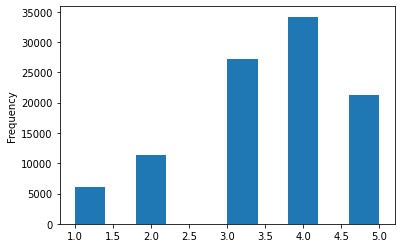

In [14]:
%matplotlib inline
grades_column = df["grade"]
grades_column.plot(kind="hist")

# Visualisation de la fréquences des notes des utilisateurs
# Il est impossible de changer l'axe des abscisses car elles ne sont pas assez fréquente

In [15]:
%%capture
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

begin=20
end=40

MSError=[]

for Kx in range(begin,end) :

    algo = KNNBasic(k=Kx)

    # Création du jeu de données d'entrainement (train) et du jeu de données
    # de test.
    # Découpage des données en 80% pour le train et 20% pour le test
    trainset, testset = train_test_split(data, test_size=.20)

    algo.fit(trainset)
    predictions = algo.test(testset)

    MSError.append(accuracy.mse(predictions))
    

    # Calcul de l'erreur moyenne au carrée (MSE -> Mean Square Error)
    # Jupyter fait énormément varier le MSE à chaque itération, sans même
    # modifier le paramètre k de KNNBasic


In [16]:
x=begin
for i in MSError:
    x+=1
    print(x,"->",i)

21 -> 0.9442582807689094
22 -> 0.9566662027695942
23 -> 0.9731132487970332
24 -> 0.9473897976906434
25 -> 0.9539013443303538
26 -> 0.9458837083857937
27 -> 0.9496462934727561
28 -> 0.9501768554335811
29 -> 0.9588980641523809
30 -> 0.9536741845844936
31 -> 0.9547710148574399
32 -> 0.9575151887607166
33 -> 0.9679919757562854
34 -> 0.947481211593789
35 -> 0.9506548412119644
36 -> 0.9717059471513878
37 -> 0.9481369860337345
38 -> 0.9484058162158046
39 -> 0.9631437427388917
40 -> 0.9547360842613282


In [19]:
%%capture
from surprise import KNNWithMeans

begin=20
end=40

MSError=[]

for Kx in range(begin,end) :

    algo = KNNWithMeans(k=Kx)

    # Création du jeu de données d'entrainement (train) et du jeu de données
    # de test.
    # Découpage des données en 80% pour le train et 20% pour le test
    trainset, testset = train_test_split(data, test_size=.20)

    algo.fit(trainset)
    predictions = algo.test(testset)

    MSError.append(accuracy.mse(predictions))
    

    # Calcul de l'erreur moyenne au carrée (MSE -> Mean Square Error)
    # Jupyter fait énormément varier le MSE à chaque itération, sans même
    # modifier le paramètre k de KNNWithMeans


In [20]:
x=begin
for i in MSError:
    x+=1
    print(x,"->",i)

21 -> 0.904561621412151
22 -> 0.9059018702927507
23 -> 0.9288648758609334
24 -> 0.9220894167353232
25 -> 0.914591656047743
26 -> 0.9041773459491022
27 -> 0.9058950933929582
28 -> 0.9082445435598564
29 -> 0.9144917766804459
30 -> 0.9175434699974134
31 -> 0.9167217883937153
32 -> 0.899790138494106
33 -> 0.91129428461823
34 -> 0.900503126516922
35 -> 0.9083275482967327
36 -> 0.9148492188369921
37 -> 0.9009098681773694
38 -> 0.9147186536727572
39 -> 0.9032503443148889
40 -> 0.9101136958476367


In [27]:

from surprise import SVD

algo = SVD()

# Création du jeu de données d'entrainement (train) et du jeu de données
# de test.
# Découpage des données en 80% pour le train et 20% pour le test
trainset, testset = train_test_split(data, test_size=.20)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.mse(predictions)
    

# Calcul de l'erreur moyenne au carrée (MSE -> Mean Square Error)

MSE: 0.8629


0.8628852833575072

In [40]:
## Logger les résultats avec mlflow

import mlflow
import time
mlflow.end_run()
begin=20
end=40

for k in range(begin,end) :
    for distance in [{'name':'msd','user_based':True,'min_support':5},{'name':'cosine','user_based': True, 'min_support':5}]:
        mlflow.start_run()
        mlflow.log_param("k",k)
        mlflow.log_param("distance", distance['name'])

        algo = KNNWithMeans(Kx)

        start_time = time.time()

        # Création du jeu de données d'entrainement (train) et du jeu de données
        # de test.
        # Découpage des données en 80% pour le train et 20% pour le test
        trainset, testset = train_test_split(data, test_size=.20)

        algo.fit(trainset)
        predictions = algo.test(testset)
        
        temps = time.time()+start_time

        acc=accuracy.mse(predictions)


        # Calcul de l'erreur moyenne au carrée (MSE -> Mean Square Error)
        # Jupyter fait énormément varier le MSE à chaque itération, sans même
        # modifier le paramètre k de KNNWithMeans

        mlflow.log_metric("temps",temps)
        mlflow.log_metric("MSE",acc)
        mlflow.end_run()


Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9136
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.8999
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9132
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9158
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9141
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9108
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9063
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9136
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9217
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9209
Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9150
Computing the msd similarity matrix...
Done computing similarity 

In [49]:
data = Dataset.load_builtin('ml-1m')

In [50]:

## 1 millions de notes

algo = KNNBasic(k=30)

# Création du jeu de données d'entrainement (train) et du jeu de données
# de test.
# Découpage des données en 80% pour le train et 20% pour le test
trainset, testset = train_test_split(data, test_size=.20)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.mse(predictions)
    

# Calcul de l'erreur moyenne au carrée (MSE -> Mean Square Error)
# Jupyter fait énormément varier le MSE à chaque itération, sans même
# modifier le paramètre k de KNNBasic

# Avec 1 million de données, le calcul d'une MSE est trèèèès long

Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.8538


0.8537891906985893

In [66]:
from sklearn.neighbors import NearestNeighbors

MatriceTD=[[ 1,-1, 0, 0,-1,-1],
           [ 0,-1, 0, 0, 1,-1],
           [ 1, 0,-1,-1, 1,-1],
           [ 0,-1, 0,-1,-1,-1]]

CSRMatriceTD=csr_matrix(MatriceTD)

neigh = NearestNeighbors(n_neighbors=3) #utilisateur + 2 plus proches voisins
neigh.fit(CSRMatriceTD)

print(neigh.kneighbors([[ 1,-1, 0, 0,-1,-1]]))
print(neigh.kneighbors([[ 0,-1, 0, 0, 1,-1]]))
print(neigh.kneighbors([[ 1, 0,-1,-1, 1,-1]]))
print(neigh.kneighbors([[ 0,-1, 0,-1,-1,-1]]))

# Visualisation des plus proches voisins de chaque utilisateur (ligne)


algo = KNNBasic(k=2)

trainset, testset = train_test_split(CSRMatriceTD, test_size=.20)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.mse(predictions)

(array([[0.        , 1.41421356, 2.23606798]]), array([[0, 3, 1]]))
(array([[0.        , 2.        , 2.23606798]]), array([[1, 2, 0]]))
(array([[0.        , 2.        , 2.64575131]]), array([[2, 1, 0]]))
(array([[0.        , 1.41421356, 2.23606798]]), array([[3, 0, 1]]))


AttributeError: raw_ratings not found